## Cosmic Structures HW2 Exercise 1: Numerical Random Fields

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

### Exercise 1a: Realisations of Gaussian Random Fields with Power Law Spectra $P(k) \propto k^{-\alpha}$ 
with different $\alpha$ and resolutions.

C:\Users\AltonV\AppData\Local\Temp\ipykernel_9912\489165762.py:14: RuntimeWarning: divide by zero encountered in power
  P_k = lambda k: np.where(k>0,k**(alpha),0.0)
C:\Users\AltonV\AppData\Local\Temp\ipykernel_9912\489165762.py:14: RuntimeWarning: divide by zero encountered in reciprocal
  P_k = lambda k: np.where(k>0,k**(alpha),0.0)


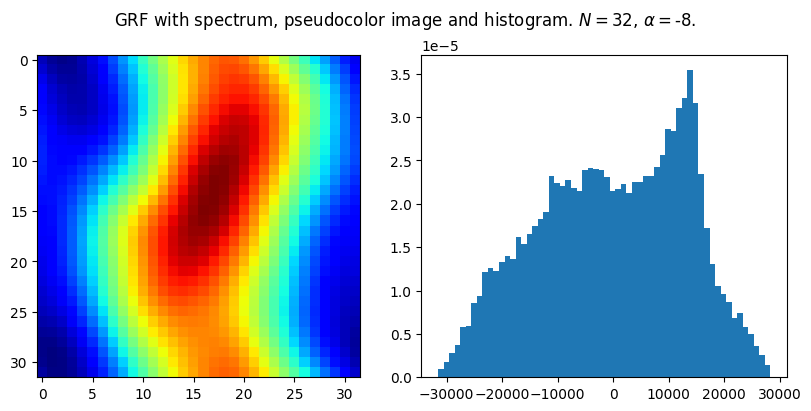

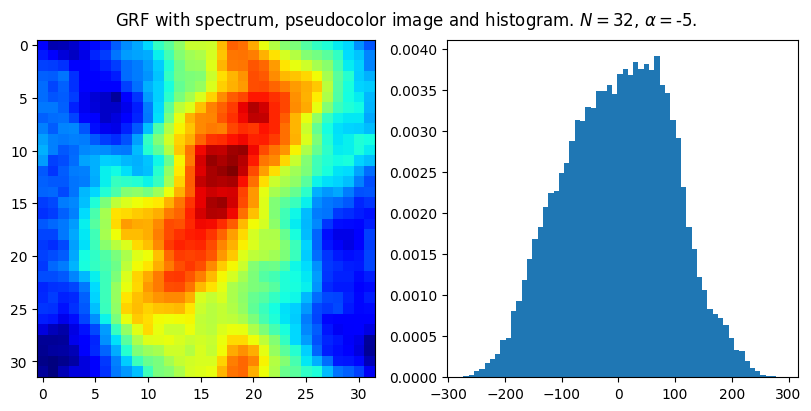

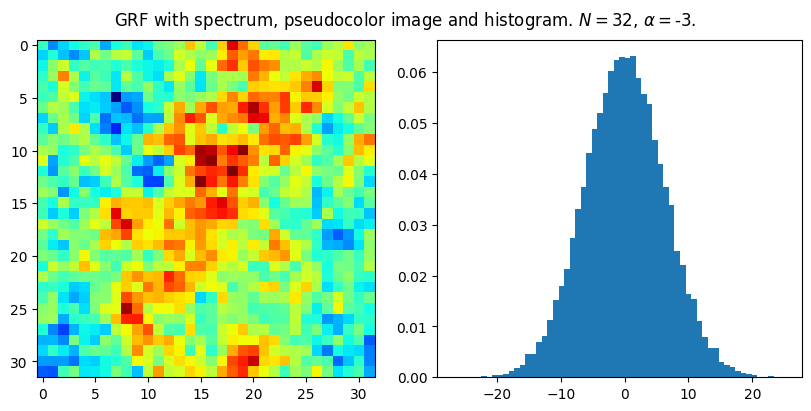

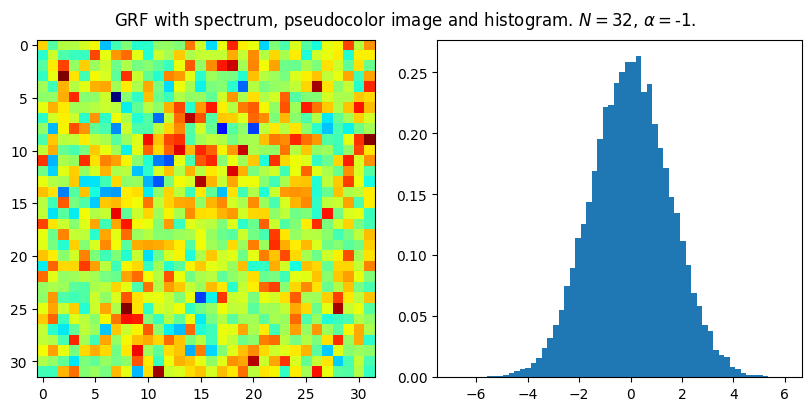

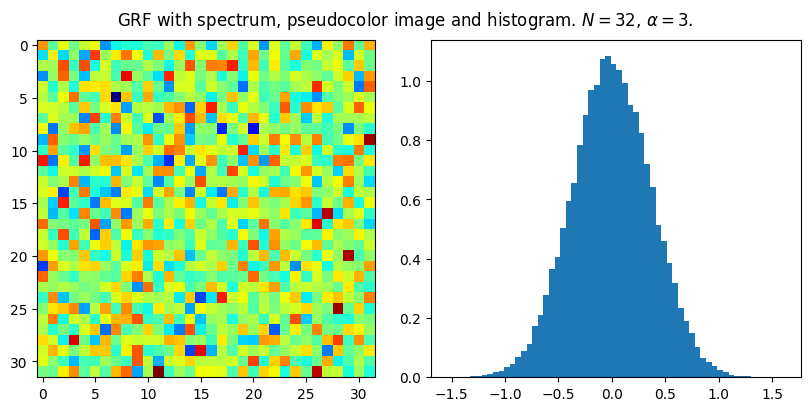

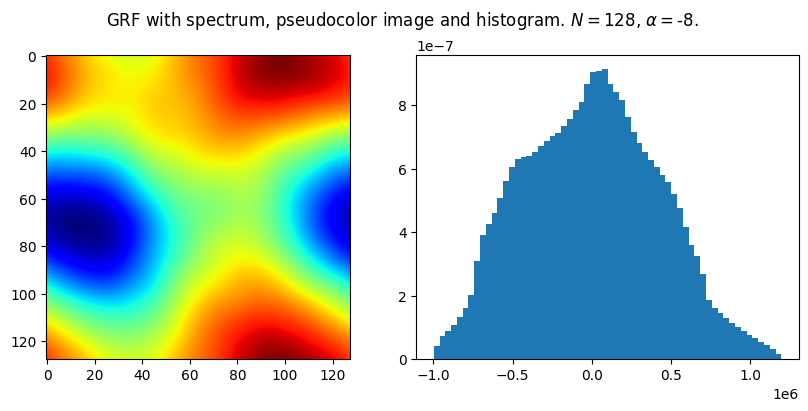

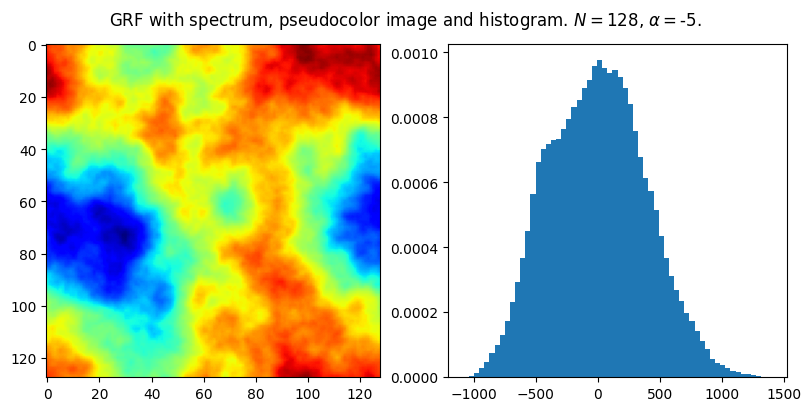

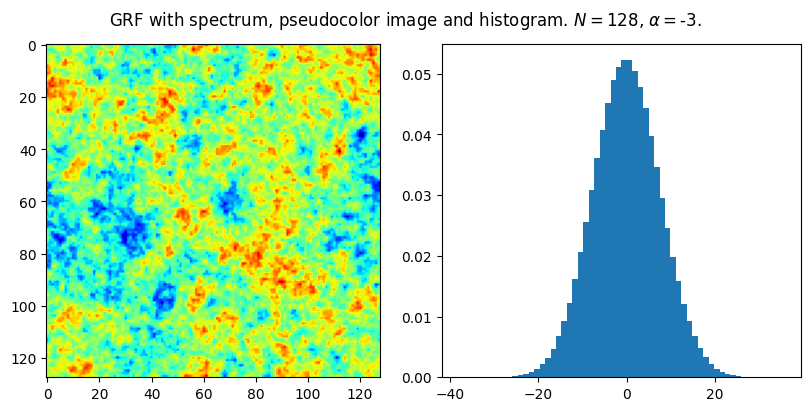

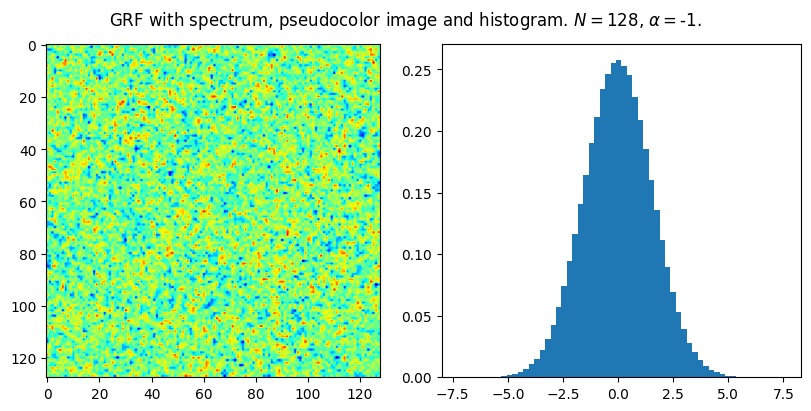

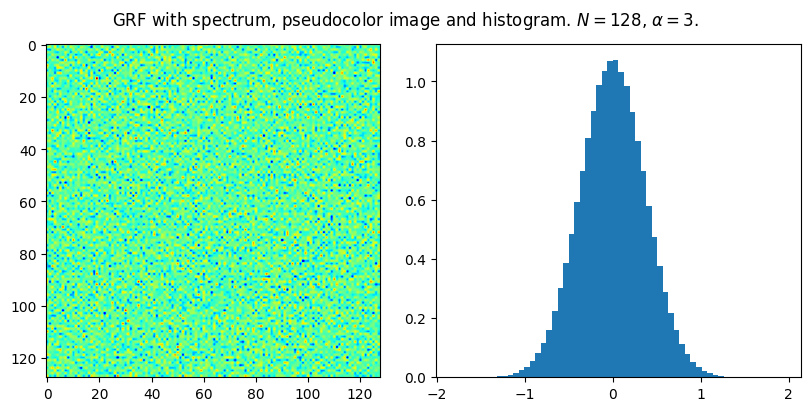

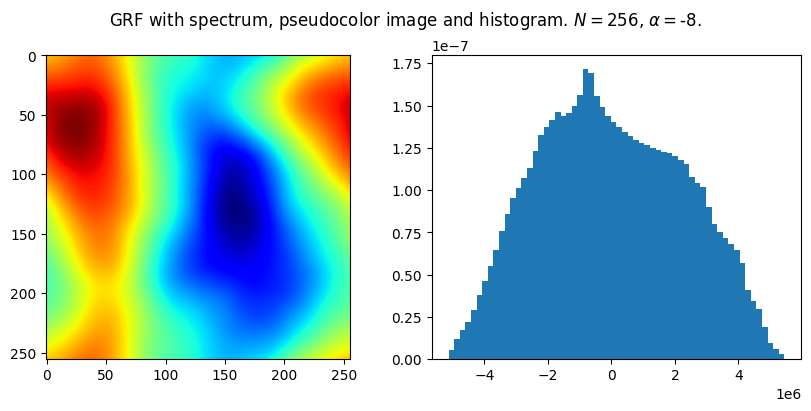

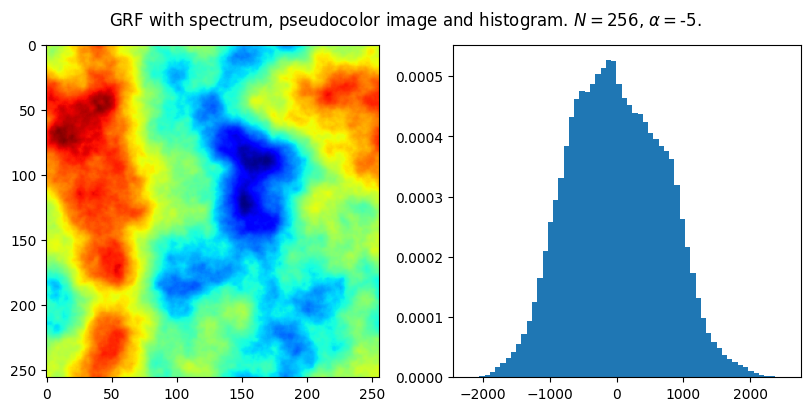

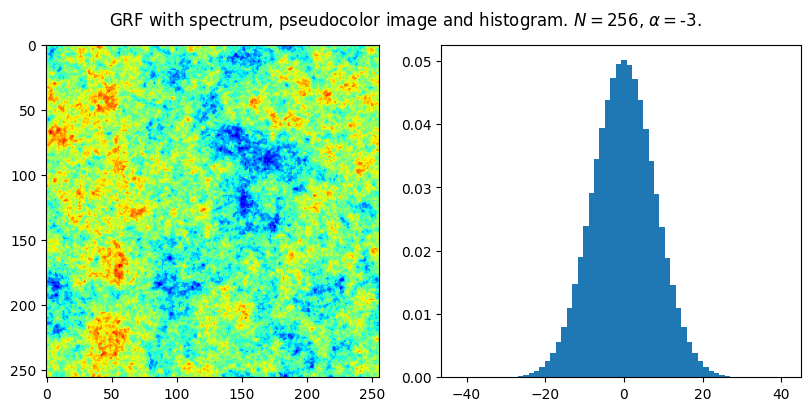

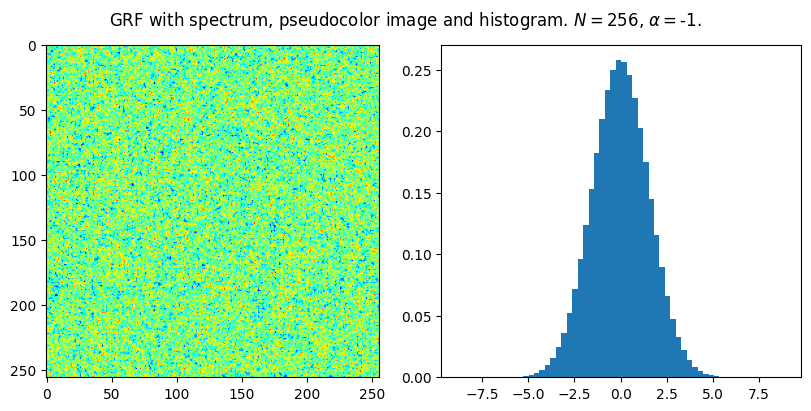

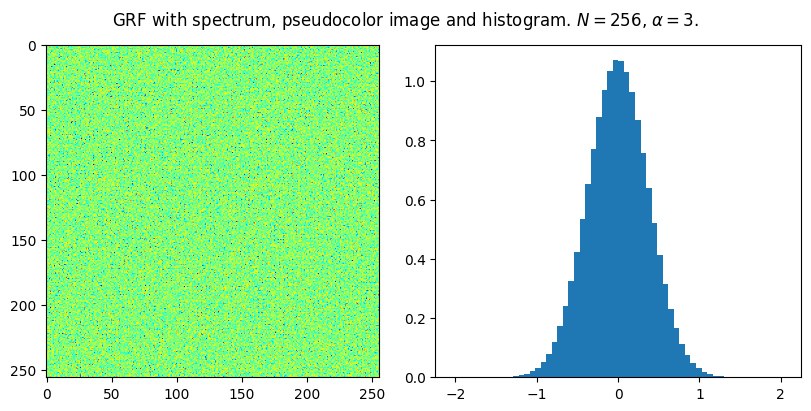

In [22]:
for N in [32, 128, 256]:
    f0 = np.random.normal(size=[N,N,N])

    # Fourier transform the uncorrelated real field -> yields uncorrelated complex field with Hermitian symmetry
    ff0 = np.fft.fftn(f0)

    # set up the modes associated with the array entries returned by fftn
    k_1d = np.fft.fftfreq(N)
    # create the 3D grid of wave numbers
    kx, ky, kz  = np.meshgrid(k_1d,k_1d,k_1d, indexing='ij')

    for alpha in [-8, -5, -3, -1, 3]:
    
        P_k = lambda k: np.where(k>0,k**(alpha),0.0)

        # compute vector norm for each entry (i,j,k)
        k = np.sqrt(kx**2 + ky**2 + kz**2)

        # Karhunen-Loève: multiply uncorrelated Gaussian field with sqrt of power spectrum and apply invere Fourier transform
        ff1 =  np.sqrt( P_k(k) ) * ff0
        f1  = np.fft.ifftn(ff1).real

        fig, ax = plt.subplots(1,2,figsize=[8,4],layout='constrained')
        fig.suptitle(f'GRF with spectrum, pseudocolor image and histogram. $N=${N}, $\\alpha=${alpha}.')
        ax[0].imshow(f1[...,N//2], cmap='jet')
        ax[1].hist(f1.flatten(),bins=60,density=True);

We find that a larger $\alpha$ leads to stronger correlations. We find that the correlations are invariant of scaling, so they look the same on every scale/resolution. 

### Exercise 1b: Realisation of gradient and Hessian fields with Fourier space technique

C:\Users\AltonV\AppData\Local\Temp\ipykernel_9912\531912097.py:15: RuntimeWarning: divide by zero encountered in power
  fk = fk * kmod ** -(alpha/2) # multiply with amplitude


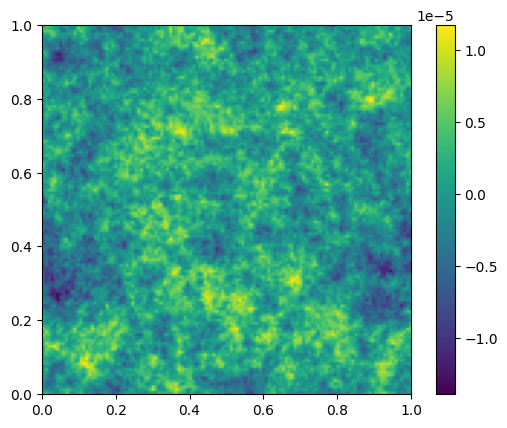

In [23]:
nvals = np.random.normal(size=1000)
N = 128
f = np.random.normal(size=(N,N,N))

L = 1.0 # the 'physical' box size, sets units of the fundamental mode
kmin = 2.0*np.pi/L # the fundamental mode of the box
kmax = kmin * N/2 # the Nyquist mode of each linear dimension
k1d = np.fft.fftfreq(N,d=1.0/kmin/N) # get FFT mode vector
kv = np.meshgrid(k1d,k1d,k1d) # get k vector, k = (kx,ky,kz)

alpha = 3.0
norm = 1.0/(2*np.pi)**(-1.5)
kmod = np.sqrt(kv[0]**2 + kv[1]**2 + kv[2]**2) # modulus of k = (kx,ky,kz)
fk = np.random.normal(size=(N,N,N)) + 1j * np.random.normal(size=(N,N,N))
fk = fk * kmod ** -(alpha/2) # multiply with amplitude
fk[0,0,0] = 0.0 # zero f(k=0), to enforce zero mean
f = np.fft.ifftn(fk) # inverse transform
f = norm * np.real( f ) # take real part and normalise

plt.imshow(f[:,:,32],extent=[0,L,0,L])
plt.colorbar()

In [24]:
# Gradient Field

# create an empty N*N*N*3 field (4D!) to hold the gradient field
fD1 = np.zeros([N,N,N,3],dtype=complex)
# loop over dimensions
for i in range(3):
    # store component i in gradient field
    fD1[...,i] = fk * 1j * kv[i] / kmod
    fD1[0,0,0,i] = 0.0
# inverse transform along axes 0,1,2 (but not 3) of the 4d array
D1 = np.real(np.fft.ifftn(fD1,axes=[0,1,2]))

C:\Users\AltonV\AppData\Local\Temp\ipykernel_9912\389795036.py:8: RuntimeWarning: invalid value encountered in divide
  fD1[...,i] = fk * 1j * kv[i] / kmod


In [25]:
# Hessian Field

# create an empty N*N*N*3*3 field (5D!) to hold the hessian field
fD2 = np.zeros([N,N,N,3,3],dtype=complex)
# loop over dimensions
for i in range(3):
    for l in range(3):
        # store component i in gradient field
        fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)
        fD2[0,0,0,i,l] = 0.0
# inverse transform along axes 0,1,2 (but not 3 and 4) of the 5d array
D2 = np.real(np.fft.ifftn(fD2,axes=[0,1,2]))

# Example: hessian at position (0,0,0)
print("Hessian at example point x=(0,0,0): \n", D2[0,0,0,:,:])

C:\Users\AltonV\AppData\Local\Temp\ipykernel_9912\3339253568.py:9: RuntimeWarning: invalid value encountered in divide
  fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)


Hessian at example point x=(0,0,0): 
 [[ 1.83011294e-07  4.27195485e-08  6.20382705e-08]
 [ 4.27195485e-08 -4.99090096e-08  1.77759205e-08]
 [ 6.20382705e-08  1.77759205e-08 -4.27753720e-08]]


### Exercise 1c: Eigenvalues of the Hessian

Fraction of field with 0 positive eigenvalues: 0.08071041107177734
Fraction of field with 1 positive eigenvalues: 0.4224538803100586
Fraction of field with 2 positive eigenvalues: 0.4183173179626465
Fraction of field with 3 positive eigenvalues: 0.07851839065551758


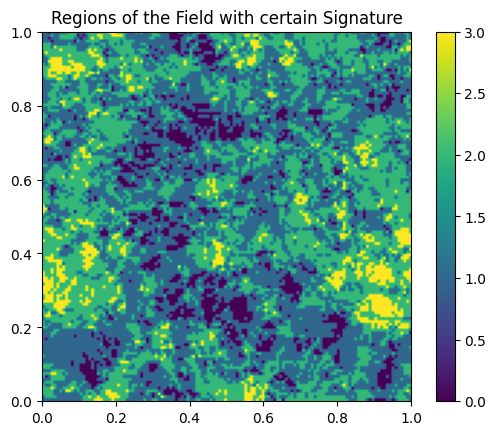

In [26]:

# Store eigenvalues of Hessian of each point x
hess_eigvals = np.zeros([N,N,N,3])
hess_eigvals[...,:] = np.linalg.eigvalsh(D2[...,:,:])

# Count number of positive eigenvalues of Hessian of each point x
hess_sig = np.zeros([N,N,N])
hess_sig[...] = np.sum(hess_eigvals > 0, axis=-1)

# Plot the signature of the Hessian field
plt.imshow(hess_sig[:,:,32],extent=[0,L,0,L])
plt.title('Regions of the Field with certain Signature')
plt.colorbar()

# Determine the fractions of the field with respective signatures
sig_frac = np.zeros([4])
for i in range(4):
    sig_frac[i] = np.sum(hess_sig == i) / N**3
    print(f'Fraction of field with {i} positive eigenvalues: {sig_frac[i]}')


Now we want to do the same but with different $\alpha$ to see if the signature of the hessian field depends on $\alpha$.

In [27]:
for alpha in [-8, -4, -3, 1, 2, 3]:

    # Generate f with power spectrum k^(-alpha)
    fk = np.random.normal(size=(N,N,N)) + 1j * np.random.normal(size=(N,N,N))
    fk = fk * kmod ** -(alpha/2) # multiply with amplitude
    fk[0,0,0] = 0.0 # zero f(k=0), to enforce zero mean
    f = np.fft.ifftn(fk) # inverse transform
    f = norm * np.real( f ) # take real part and normalise

    # create an empty N*N*N*3*3 field (5D!) to hold the hessian field
    fD2 = np.zeros([N,N,N,3,3],dtype=complex)
    # loop over dimensions
    for i in range(3):
        for l in range(3):
            # store component i in gradient field
            fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)
            fD2[0,0,0,i,l] = 0.0
    # inverse transform along axes 0,1,2 (but not 3 and 4) of the 5d array
    D2 = np.real(np.fft.ifftn(fD2,axes=[0,1,2]))

    # Store eigenvalues of Hessian of each point x
    hess_eigvals = np.zeros([N,N,N,3])
    hess_eigvals[...,:] = np.sort(np.linalg.eigvalsh(D2[...,:,:]))

    # Count number of positive eigenvalues of Hessian of each point x
    hess_sig = np.zeros([N,N,N])
    hess_sig[...] = np.sum(hess_eigvals > 0, axis=-1)

    # Determine the fractions of the field with respective signatures
    sig_frac = np.zeros([4])
    for i in range(4):
        sig_frac[i] = np.sum(hess_sig == i) / N**3
   
    print(f'For alpha = {alpha} the fractions of the field with respective signatures are:', sig_frac)

C:\Users\AltonV\AppData\Local\Temp\ipykernel_9912\1902933200.py:16: RuntimeWarning: invalid value encountered in divide
  fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)


For alpha = -8 the fractions of the field with respective signatures are: [0.08551693 0.41429234 0.41461992 0.08557081]
For alpha = -4 the fractions of the field with respective signatures are: [0.08264017 0.41745996 0.41720486 0.08269501]
For alpha = -3 the fractions of the field with respective signatures are: [0.08180809 0.41815615 0.41817522 0.08186054]


C:\Users\AltonV\AppData\Local\Temp\ipykernel_9912\1902933200.py:5: RuntimeWarning: divide by zero encountered in power
  fk = fk * kmod ** -(alpha/2) # multiply with amplitude


For alpha = 1 the fractions of the field with respective signatures are: [0.07999229 0.41984177 0.42018461 0.07998133]


C:\Users\AltonV\AppData\Local\Temp\ipykernel_9912\1902933200.py:5: RuntimeWarning: divide by zero encountered in reciprocal
  fk = fk * kmod ** -(alpha/2) # multiply with amplitude


For alpha = 2 the fractions of the field with respective signatures are: [0.07981968 0.42044449 0.41984034 0.0798955 ]
For alpha = 3 the fractions of the field with respective signatures are: [0.07932711 0.41953516 0.42127514 0.07986259]


For every $\alpha$, the signature fractions are close to our estimated fractions $P[+++]=P[---]=8\%$ and $P[+--]=P[++-]=42\%$ of a Gaussian random field.
The signature corresponds to the extrema of the field. All eigenvalues of the Hessian positive means a local minimum, two eigenvalues positive mean a saddle point, one eigenvalue positive a ridge and all eigenvalues negative correspond to a minimum. 

We find that the fraction of the field with each signature is completely independent of the power law exponent.

### Exercise 1d: Distribution of ordered Eigenvalues of Hessian Field

In [28]:
# Define analytical expressions for the probability density functions of the eigenvalues of the Hessian matrix from the lecture notes

def p_lambda1(lambda1, sigma2):
    part1 = np.sqrt(5/(72*np.pi))*(20*lambda1**2-sigma2**2)/sigma2**3*(erf(lambda1*np.sqrt(2)/sigma2)+1)*np.exp(-5*lambda1**2/(2*sigma2**2))
    part2 = np.sqrt(15/(16*np.pi*sigma2**2))*(erf(lambda1*np.sqrt(3)/(2*sigma2))+1)*np.exp(-15*lambda1**2/(4*sigma2**2))
    part3 = 5*np.sqrt(5)/(3*np.pi*sigma2**2)*lambda1*np.exp(-9*lambda1**2/(2*sigma2**2))
    return part1 + part2 + part3

def p_lambda2(lambda2, sigma2):
    return np.sqrt(15/(4*np.pi*sigma2**2))*np.exp(-15*lambda2**2/(4*sigma2**2))

def p_lambda3(lambda3, sigma2):
    return p_lambda1(-lambda3, sigma2)


C:\Users\AltonV\AppData\Local\Temp\ipykernel_9912\2845702026.py:16: RuntimeWarning: invalid value encountered in divide
  fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)


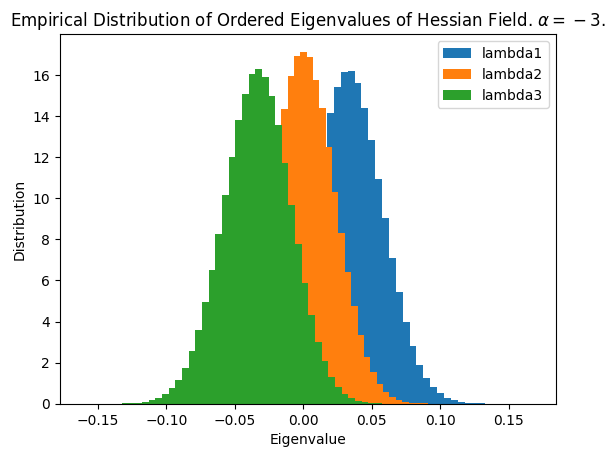

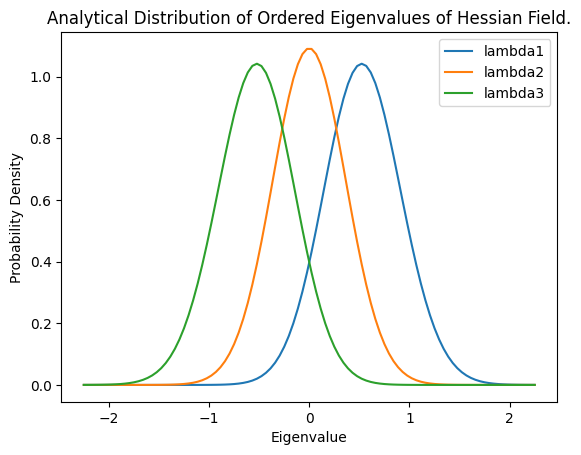

In [29]:
  
# Generate f with power spectrum k^(-alpha)
alpha = -3
fk = np.random.normal(size=(N,N,N)) + 1j * np.random.normal(size=(N,N,N))
fk = fk * kmod ** -(alpha/2) # multiply with amplitude
fk[0,0,0] = 0.0 # zero f(k=0), to enforce zero mean
f = np.fft.ifftn(fk) # inverse transform
f = norm * np.real( f ) # take real part and normalise
sigma2 = np.sqrt(f.var())

# create an empty N*N*N*3*3 field (5D!) to hold the hessian field
fD2 = np.zeros([N,N,N,3,3],dtype=complex)
# loop over dimensions
for i in range(3):
    for l in range(3):
        # store component i in gradient field
        fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)
        fD2[0,0,0,i,l] = 0.0
# inverse transform along axes 0,1,2 (but not 3 and 4) of the 5d array
D2 = np.real(np.fft.ifftn(fD2,axes=[0,1,2]))

# Store eigenvalues of Hessian of each point x
hess_eigvals = np.zeros([N,N,N,3])
hess_eigvals[...,:] = np.sort(np.linalg.eigvalsh(D2[...,:,:]))

# Get every eigenvalue distribution in flat array
lambda1 = hess_eigvals[:,:,:,2].flatten()
lambda2 = hess_eigvals[:,:,:,1].flatten()
lambda3 = hess_eigvals[:,:,:,0].flatten()

plt.hist(lambda1/sigma2, bins=50, density=True, label='lambda1')
plt.hist(lambda2/sigma2, bins=50, density=True, label='lambda2')
plt.hist(lambda3/sigma2, bins=50, density=True, label='lambda3')
plt.xlabel('Eigenvalue')
plt.ylabel('Distribution')
plt.title(f'Empirical Distribution of Ordered Eigenvalues of Hessian Field. $\\alpha={alpha}$.')
plt.legend()
plt.show()

# Check analytical distribution to compare qualitatively
x = np.linspace(-2.25, 2.25, 100)
sigma2 = 1

plt.plot(x, p_lambda1(x, sigma2), label='lambda1')
plt.plot(x, p_lambda2(x, sigma2), label='lambda2')
plt.plot(x, p_lambda3(x, sigma2), label='lambda3')
plt.xlabel('Eigenvalue')
plt.ylabel('Probability Density')
plt.title(f'Analytical Distribution of Ordered Eigenvalues of Hessian Field.')
plt.legend()
plt.show()

The distribution of the ordered eigenvalues matches the analytical distribution from the lecture notes pretty closely. 

### Exercise 1e: One-point statistics

The covariance between derivatives of a $(N, 1)$ random field is given by the general formula
$$ \langle \frac{\partial^{\alpha+\beta}f}{\partial x^{\alpha}_{i} \partial x^{\beta}_{j}} \frac{\partial^{\kappa+\lambda}f}{\partial x^{\kappa}_{l} \partial x^{\lambda}_{m}} \rangle _{1pt} = 
(-1)^{\alpha + \beta} \text{i}^{\alpha + \beta + \kappa + \lambda} \int \frac{d^{N}k}{(2 \pi)^{N}} k^{\alpha}_{i} k^{\beta}_{j} k^{\kappa}_{l} k^{\lambda}_{m} P(k)$$

We have the following definition for spectral moments:
$$ \sigma^{2}_{n} := \frac{1}{(2 \pi)^{3}} \int d^{3}k k^{2n} P(k) $$

Let $f(x)$ be a $(3,1)$ Gaussian random field with zero mean and finite spectral moments. 
Prove that the following relations for the one-point statistics of the components of the Hessian of a GRF hold.
$$ \langle f \frac{\partial^{2}f}{\partial x_{i} \partial x_{j}} \rangle _{1pt} = - \frac{\sigma^{2}_{1}}{3} \delta_{ij}$$
$$ \langle \frac{\partial^{2}f}{\partial x_{i} \partial x_{j}} \frac{\partial^{2}f}{\partial x_{k} \partial x_{l}} \rangle _{1pt} = - \frac{\sigma^{2}_{2}}{15} (\delta_{ij} \delta_{kl} + \delta_{ik} \delta_{jl} + \delta_{il} \delta_{kj})$$
where $\sigma^{2}_{1}$ and $\sigma^{2}_{2}$ are the first and second spectral moments of $f$, respectively, and $\delta_{ij}$ is
the Kronecker symbol.

#### Relation 1

To find the covariance $ \langle f \frac{\partial^2 f}{\partial x_i \partial x_j} \rangle _{1pt} $, we set $\alpha = \beta = 0$ for the $ f $ term and $\kappa = \lambda = 1$ for the $\frac{\partial^2 f}{\partial x_i \partial x_j}$ term. 

Therefore we have:
$ \langle f(x) \frac{\partial^2 f(y)}{\partial x_i \partial x_j} \rangle = \text{i}^{0+0+1+1} \int \frac{d^{3}k}{(2 \pi)^{3}} k^{1}_i k^{1}_j P(k) = - \int \frac{d^{3}k}{(2 \pi)^{3}} k_i k_j P(k)$. 

To compute the integral, we note that $ P(k) $ is isotropic and symmetric, meaning that only even powers contribute to the integral, which is if $i=j$. Thus,
$ \int d^3 k \, k_i k_j P(k) = \frac{\delta_{ij}}{3} \int d^3 k \, k^2 P(k). $
Now, we incorporate the definition of the spectral moment:
$ \sigma^2_1 := \frac{1}{(2 \pi)^3} \int d^3 k \, k^2 P(k). $
Putting it all together, we get:
$$ \langle f \frac{\partial^2 f}{\partial x_i \partial x_j} \rangle _{1pt} = - \frac{1}{(2 \pi)^3} \frac{\delta_{ij}}{3} \int d^3 k \, k^2 P(k) = -\frac{\sigma^2_1}{3} \delta_{ij}. $$
Thus, we have proved:
$$ \langle f \frac{\partial^2 f}{\partial x_i \partial x_j} \rangle _{1pt} = \frac{\sigma^2_1}{3} \delta_{ij}. $$

#### Relation 2

To prove the relation
$$ \langle \frac{\partial^{2} f}{\partial x_i \partial x_j} \frac{\partial^{2} f}{\partial x_k \partial x_l} \rangle _{1pt} = \frac{\sigma^2_2}{15} (\delta_{ij} \delta_{kl} + \delta_{ik} \delta_{jl} + \delta_{il} \delta_{kj}), $$
we start by using the given covariance formula for derivatives of a random field. For the Gaussian random field $ f(x) $, the covariance between the second derivatives is expressed as:
$$ \langle \frac{\partial^{2} f(x)}{\partial x_i \partial x_j} \frac{\partial^{2} f(y)}{\partial x_k \partial x_l} \rangle. $$

Now a straightforward way is to go to ordinary 3D spherical coordinated, then we have $k_{x} = || k || \text{sin} \theta \text{cos} \psi$. Now we can take without loss of generaltity index $i$ to denote the x-direction. If $i=j=k=l$, then $k_{i}=k_{j}=k_{l}=k_{m}=k_{x}^{4}$. Then we can look at all possible combinations of other indices. By symmetry, many will vanish. Those who do not should give the desired result.

Given that $ f(x) $ is a Gaussian random field with zero mean and finite spectral moments, we use the general formula:
$$ \langle \frac{\partial^{\alpha+\beta} f}{\partial x^{\alpha}_i \partial x^{\beta}_j} \frac{\partial^{\kappa+\lambda} f}{\partial x^{\kappa}_l \partial x^{\lambda}_m} \rangle _{1pt} = (-1)^{\alpha + \beta} \text{i}^{\alpha + \beta + \kappa + \lambda} \int \frac{d^N k}{(2 \pi)^N} k_i^\alpha k_j^\beta k_l^\kappa k_m^\lambda P(k). $$

To find the covariance $ \langle \frac{\partial^2 f}{\partial x_i \partial x_j} \frac{\partial^2 f}{\partial x_k \partial x_l} \rangle _{1pt} $, we set $\alpha = \beta = \kappa = \lambda = 1$. This simplifies the formula to:
$$ \langle \frac{\partial^2 f(x)}{\partial x_i \partial x_j} \frac{\partial^2 f(y)}{\partial x_k \partial x_l} \rangle = \text{i}^{1+1+1+1} \int \frac{d^3 k}{(2 \pi)^3} k_i k_j k_k k_l P(k) = \int \frac{d^3 k}{(2 \pi)^3} k_i k_j k_k k_l P(k). $$

To compute the integral, we use again the isotropy and symmetry of $ P(k) $. It implies that any odd power of $ k_i $ in the integrand vanishes and even powers can be simplified using the Kronecker delta. This time we have 5 different even powers and therefore contributions: $i=j, k \neq l$; $i=k, j \neq l$; $i=l, k \neq j$; $i=j, k=l$ and $i=j=k=l$. Therefore, solving also the intagral in 3-dimensional space and using the definition of $\sigma_{2}^{2}$, we get:

$$ \langle \frac{\partial^2 f}{\partial x_i \partial x_j} \frac{\partial^2 f}{\partial x_k \partial x_l} \rangle _{1pt} = \frac{\sigma^2_2}{15} (\delta_{ij} \delta_{kl} + \delta_{ik} \delta_{jl} + \delta_{il} \delta_{jk}). $$

### Exercise 1f: Cholesky Sampler

In [54]:
nsamples = 10000

sigma1 = 1
sigma2 = 1
sigma_t = np.sqrt(sigma2**2/15)

# Upper triangular matrix from Cholesky decomposition
# of covariance matrix Σs
Ls = sigma2/np.sqrt(5) * np.array([[1, 0, 0], \
[1/3, np.sqrt(8)/3, 0], \
[1/3, 1/np.sqrt(18), np.sqrt(5/6)]])

# for i in range(nsamples):
# draw t=(H12,H13,H23) from uncorrelated Gaussian
t = np.random.normal(0,sigma_t,size=(nsamples,3))

# draw s=(H11,H22,H33) from correlated Gaussian using Cholesky sampling
s = np.random.normal(0,1,size=(nsamples,3)).dot(Ls.T)

# assemble Hessian matrix from components
H = np.zeros((nsamples,3,3))

H[:,0,0] = s[:,0]
H[:,1,1] = s[:,1]
H[:,2,2] = s[:,2]
H[:,0,1] = t[:,0]; H[:,1,0] = t[:,0]
H[:,0,2] = t[:,1]; H[:,2,0] = t[:,1]
H[:,2,1] = t[:,2]; H[:,1,2] = t[:,2]

# get absolute value of the determinant
h = np.abs(H)

# compute the expectation value
exp_ncrit = np.sqrt(27)/((2*np.pi)**1.5*sigma1**3) * np.mean( h )
print(f'Expectation value of the number of critical points: {exp_ncrit}')

Expectation value of the number of critical points: 0.08476937287313133


Now we want to verify that the Cholesky sampler yields the correct covariance matrix.

In [61]:
Cs_empirical = np.cov( s, rowvar=False )
print(f'Empirical covariance matrix of s: \n{Cs_empirical}')

Cs_analytical = sigma2**2/15 * np.array([[3, 1, 1],
                                         [1, 3, 1],
                                         [1, 1, 3]])
# Same as Cs_analytical = Ls.dot(Ls.T)
print(f'Analytical covariance matrix of s: \n{Cs_analytical}')

# Difference between empirical and analytical covariance matrix
diff = Cs_empirical - Cs_analytical
print(f'Difference between empirical and analytical covariance matrix: \n{np.abs(diff)}')

Empirical covariance matrix of s: 
[[0.20400835 0.06979827 0.07123634]
 [0.06979827 0.19913161 0.06939912]
 [0.07123634 0.06939912 0.20255112]]
Analytical covariance matrix of s: 
[[0.2        0.06666667 0.06666667]
 [0.06666667 0.2        0.06666667]
 [0.06666667 0.06666667 0.2       ]]
Difference between empirical and analytical covariance matrix: 
[[0.00400835 0.00313161 0.00456967]
 [0.00313161 0.00086839 0.00273246]
 [0.00456967 0.00273246 0.00255112]]


We are pretty close with our empirical covariance matrix! Of course, the higher our nsamples, the closer we will be to our analytical matrix.

### Exercise 1g: Density of Maxima

In [89]:
nsamples = 1000
sigma1 = 1
sigma2 = 1
sigma0 = 1  # standard deviation for f
gammas = [0.01, 0.1, 0.5, 1, 2] # constraint factors for f
result = []

for gamma in gammas:
    sigma_t = np.sqrt(sigma2**2 / 15)

    # Define the mean vector for the joint distribution
    mean = np.zeros(10)  # (f, H11, H22, H33, H12, H13, H23,...) -> 1 + 9 elements

    # Define the covariance matrix for the joint distribution
    cov_f_H = np.zeros((10, 10))

    # Variances for f and H components
    cov_f_H[0, 0] = sigma0**2  # variance of f
    cov_f_H[1, 1] = cov_f_H[2, 2] = cov_f_H[3, 3] = sigma2**2 / 5  # variances of H11, H22, H33
    cov_f_H[4, 4] = cov_f_H[5, 5] = cov_f_H[6, 6] = sigma_t**2  # variances of H12, H13, H23

    # Covariances between f and H elements (assuming some correlation factor rho)
    rho = 0.5  # correlation coefficient
    cov_f_H[0, 1:4] = cov_f_H[1:4, 0] = rho * sigma0 * sigma2 / np.sqrt(5)

    # Covariances between H elements
    cov_f_H[1, 2] = cov_f_H[2, 1] = (sigma2**2) / 15
    cov_f_H[1, 3] = cov_f_H[3, 1] = (sigma2**2) / 15
    cov_f_H[2, 3] = cov_f_H[3, 2] = (sigma2**2) / 15
    cov_f_H[4, 5] = cov_f_H[5, 4] = (sigma2**2) / 45
    cov_f_H[4, 6] = cov_f_H[6, 4] = (sigma2**2) / 45
    cov_f_H[5, 6] = cov_f_H[6, 5] = (sigma2**2) / 45

    # Ensure positive definiteness by adjusting eigenvalues if necessary
    eigvals, eigvecs = np.linalg.eigh(cov_f_H)
    eigvals[eigvals < 1e-10] = 1e-10  # Adjust small or negative eigenvalues
    cov_f_H_posdef = eigvecs @ np.diag(eigvals) @ eigvecs.T

    # Perform Cholesky decomposition for the positive definite covariance matrix
    L_joint = np.linalg.cholesky(cov_f_H_posdef)

    # Sample from the joint Gaussian distribution
    joint_samples = np.random.normal(0, 1, (nsamples, 10)).dot(L_joint.T)

    # Extract the samples for f and H
    f_samples = joint_samples[:, 0]
    H_samples = joint_samples[:, 1:].reshape((nsamples, 3, 3))

    # Apply the constraint f >= gamma * sigma0
    valid_samples = f_samples >= gamma * sigma0
    H_valid = H_samples[valid_samples]

    # Compute eigenvalues of the valid Hessian matrices
    eigvals = np.linalg.eigvalsh(H_valid)

    # Count the number of maxima (all eigenvalues < 0)
    maxima_count = np.sum(np.all(eigvals < 0, axis=1))

    # Compute the expectation value of the number of critical points
    exp_ncrit = np.sqrt(27) / ((2 * np.pi)**1.5 * sigma1**3) * maxima_count / nsamples

    print(f'Expectation value of the number of critical points (with f >= γσ0) where γ={gamma}: {exp_ncrit}')
    result.append(exp_ncrit)


Expectation value of the number of critical points (with f >= γσ0) where γ=0.01: 0.007588220034281659
Expectation value of the number of critical points (with f >= γσ0) where γ=0.1: 0.009567755695398613
Expectation value of the number of critical points (with f >= γσ0) where γ=0.5: 0.0019795356611169547
Expectation value of the number of critical points (with f >= γσ0) where γ=1: 0.0016496130509307957
Expectation value of the number of critical points (with f >= γσ0) where γ=2: 0.0


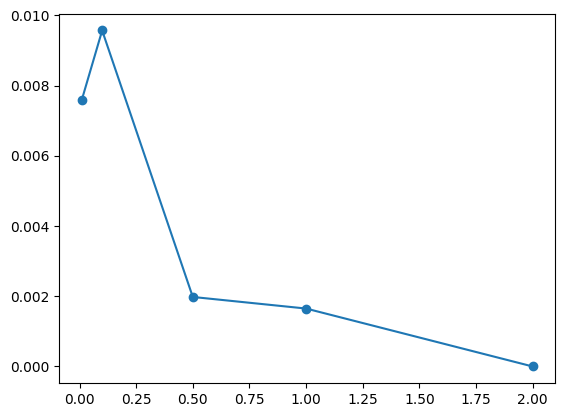

In [90]:
plt.plot(gammas, result, marker='o')

As expected, a smaller $\gamma$ allows for more extrema to be valid. Therefore, the number of critical points as a function of increasing $\gamma$ is (roughly) decreasing.